In [4]:
#IMPORT LIBRARIES
from src.read_data import read_datasets, merge_phylo_data, load_reference_data
from src.plot import plot_hiv_genome
from src.compute_MAF import compute_MAF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches

In [5]:
#READ DATA
data_frames = read_datasets()
agg_data_df, phylo_features_df, maf_data_df, rakai_maf_data_df, rakai_phylo_data_df = data_frames.values()

#MERGE UGANDA AND BOTSWANA DATASETS
df = merge_phylo_data(phylo_features_df, rakai_phylo_data_df)

/Users/andreawickman/saving_lives/src/read_data.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rakai_data['xcoord'] = np.ceil(rakai_data['xcoord'])


/var/folders/rt/3hw_n0v124vg8h2q8kwnx3180000gn/T/ipykernel_43508/139927577.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset_df = df.groupby('TSI_category').apply(lambda x: x[x['AID'].isin(x['AID'].unique()[:10])]).reset_index(drop=True)


/var/folders/rt/3hw_n0v124vg8h2q8kwnx3180000gn/T/ipykernel_43508/139927577.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subset_df = df.groupby('TSI_category').apply(lambda x: x[x['AID'].isin(x['AID'].unique()[:10])]).reset_index(drop=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


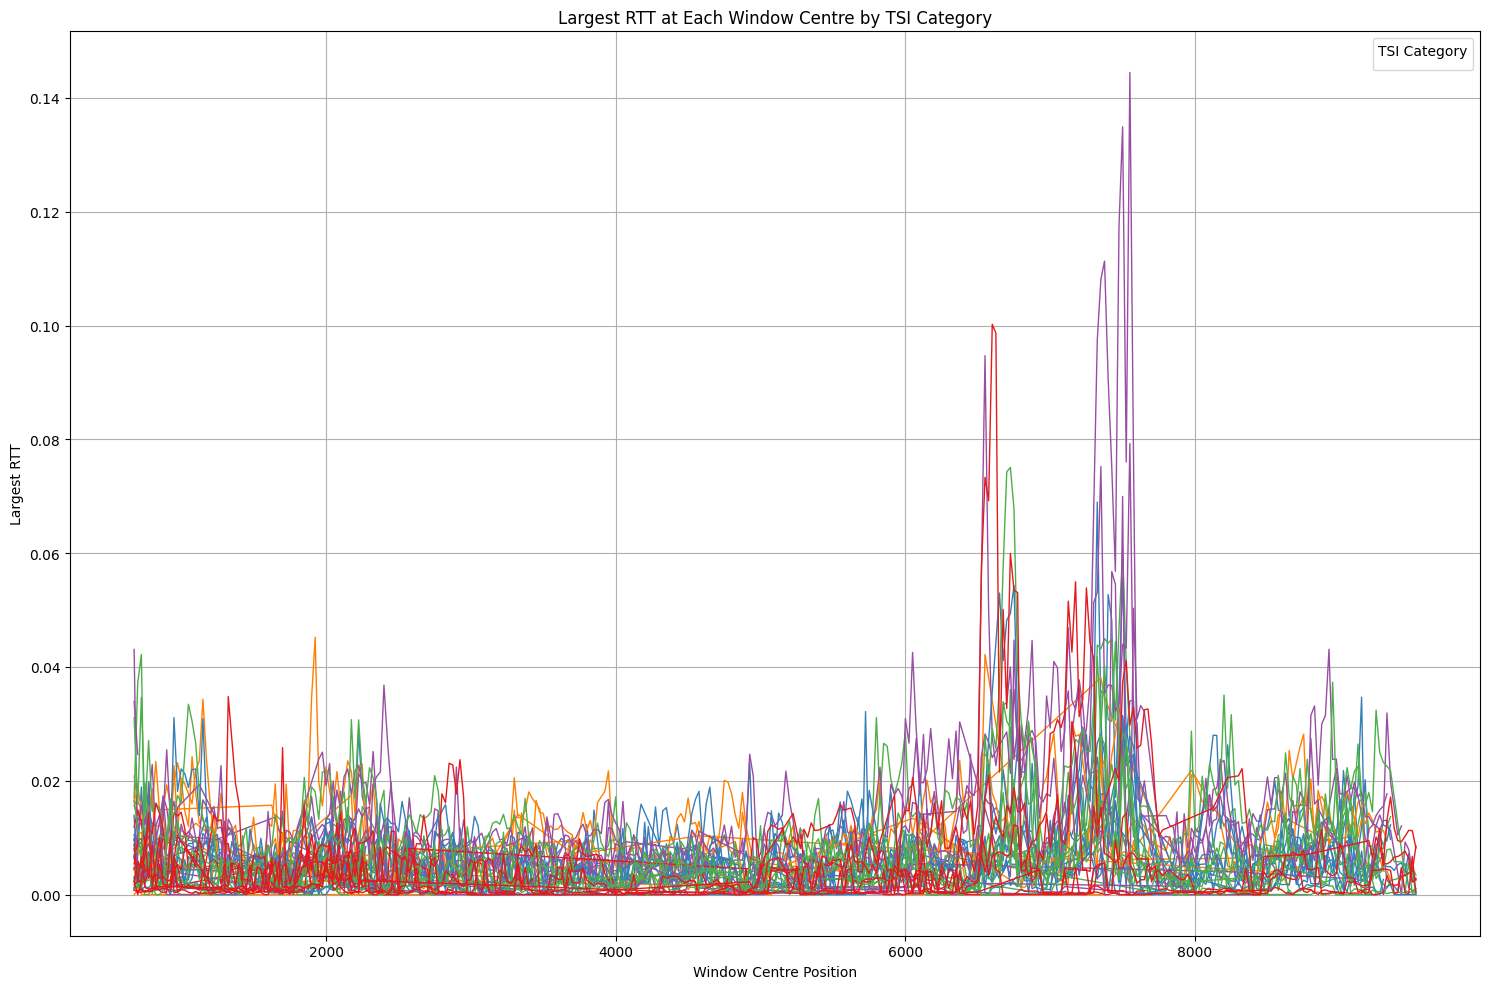

In [33]:
np.random.seed(42)
subset_df = df.groupby('TSI_category').apply(lambda x: x[x['AID'].isin(x['AID'].unique()[:10])]).reset_index(drop=True)
subset_df = subset_df.sort_values(by=['AID', 'xcoord'])

plt.figure(figsize=(15, 10))

for aid in subset_df['AID'].unique():
    subset = subset_df[subset_df['AID'] == aid]
    sns.lineplot(data=subset, x='xcoord', y='largest.rtt', hue='TSI_category', palette='Set1', linewidth=1, legend=False)

# Add legend for TSI categories
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='TSI Category', loc='upper right')

plt.title('Largest RTT at Each Window Centre by TSI Category')
plt.xlabel('Window Centre Position')
plt.ylabel('Largest RTT')
plt.grid(True)
plt.legend(title='TSI Category')
plt.tight_layout()
plt.show()